In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#reading the data from the local system
df=pd.read_excel(r"/Users/arjunsahas/Downloads/spam.xlsx")
df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [44]:
df.shape

(4601, 58)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

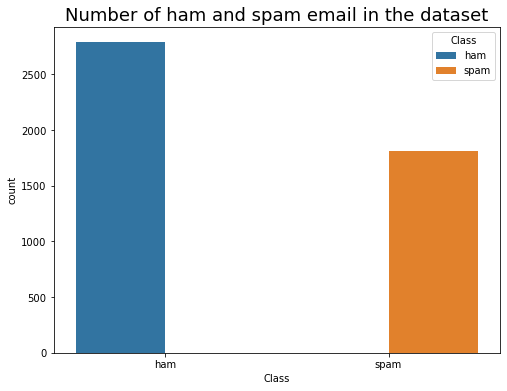

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(df["Class"],hue=df["Class"])
plt.title("Number of ham and spam email in the dataset",fontsize=18)
plt.show()

In [5]:
#making the target column to ham as 0 and spam as 1.
df['Class']=df["Class"].replace({"ham":0,"spam":1})

In [6]:
#making dependent and Independent features
X=df.drop(columns=['Class'],axis=1)
y=df["Class"]

In [7]:
#Splitting the dataset into trainingset and testingset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [8]:
#building the model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=3)
#training the model
dt_model.fit(X_train,y_train)
#predictions 1
pred_1=dt_model.predict(X_test)

[Text(0.5, 0.875, 'X[51] <= 0.08\ngini = 0.482\nsamples = 3220\nvalue = [1914, 1306]'),
 Text(0.25, 0.625, 'X[6] <= 0.045\ngini = 0.275\nsamples = 1855\nvalue = [1549, 306]'),
 Text(0.125, 0.375, 'X[52] <= 0.166\ngini = 0.197\nsamples = 1720\nvalue = [1529, 191]'),
 Text(0.0625, 0.125, 'gini = 0.157\nsamples = 1657\nvalue = [1515, 142]'),
 Text(0.1875, 0.125, 'gini = 0.346\nsamples = 63\nvalue = [14, 49]'),
 Text(0.375, 0.375, 'X[26] <= 0.08\ngini = 0.252\nsamples = 135\nvalue = [20, 115]'),
 Text(0.3125, 0.125, 'gini = 0.171\nsamples = 127\nvalue = [12, 115]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.625, 'X[54] <= 2.306\ngini = 0.392\nsamples = 1365\nvalue = [365, 1000]'),
 Text(0.625, 0.375, 'X[15] <= 0.285\ngini = 0.48\nsamples = 458\nvalue = [275, 183]'),
 Text(0.5625, 0.125, 'gini = 0.385\nsamples = 342\nvalue = [253, 89]'),
 Text(0.6875, 0.125, 'gini = 0.307\nsamples = 116\nvalue = [22, 94]'),
 Text(0.875, 0.375, 'X[24] <= 0.41\ngini = 0.17

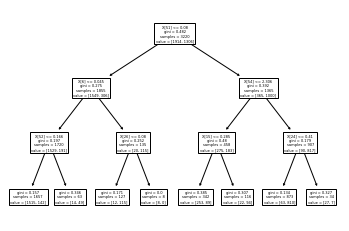

In [9]:
tree.plot_tree(dt_model)

In [10]:
#Checking the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
acc_score=accuracy_score(y_test,pred_1)
print("Decision tree model accuracy %.2f" % acc_score)

Decision tree model accuracy 0.89


In [11]:
#confusion matrix
con_matrix=confusion_matrix(y_test,pred_1)
print("confusion matrix for decision tree: \n",con_matrix)

confusion matrix for decision tree: 
 [[816  58]
 [ 91 416]]


In [12]:
from sklearn.metrics import classification_report
cls_report=classification_report(y_test,pred_1)
print('decision tree classification report: \n',cls_report)

decision tree classification report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       874
           1       0.88      0.82      0.85       507

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381



### Random forest model with 10,50,100,500,1000,5000 base learners

In [13]:
base_learners=[10,50,100,500,1000,5000]
for i in base_learners:
    rfc=RandomForestClassifier(n_estimators=i)
    #training the model
    rfc.fit(X_train,y_train)
    #predictions 2
    rf_pred=rfc.predict(X_test)
    acc_score=accuracy_score(y_test,rf_pred)
    print("Random forest model with {} base learners and the accuracy is {:.3f}" .format(i,acc_score))
    con_matrix=confusion_matrix(y_test,rf_pred)
    print("confusion matrix with {} base learners: \n {}".format(i,con_matrix))
    cls_report=classification_report(y_test,rf_pred)
    print("classification report with {} base learners \n {}".format(i,cls_report))
    #perclass accuracy rate
    tp=con_matrix[0][0]
    fp=con_matrix[0][1]
    fn=con_matrix[1][0]
    tn=con_matrix[1][1]
    #per-class classification accuracy
    spam=tn/(fn+tn)
    print("per-class classification accuracy of spam: {:.2f}".format(spam))
    ham=tp/(tp+fp)
    print("per-class classification accuracy of ham: {:.2f}".format(ham))
    print("======================================================================================================")

Random forest model with 10 base learners and the accuracy is 0.948
confusion matrix with 10 base learners: 
 [[848  26]
 [ 46 461]]
classification report with 10 base learners 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       874
           1       0.95      0.91      0.93       507

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381

per-class classification accuracy of spam: 0.91
per-class classification accuracy of ham: 0.97
Random forest model with 50 base learners and the accuracy is 0.956
confusion matrix with 50 base learners: 
 [[851  23]
 [ 38 469]]
classification report with 50 base learners 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       874
           1       0.95      0.93      0.94       507

    accuracy                           0.96      1381
  

### Hyperparameter tuning to obtain the best parameters.

In [36]:
#different parameters in each attribute 
n_estimators=list(range(50,300,50))
criterion=["gini","entropy","log_loss"]
max_depth=list(range(1,20,2))
min_samples_split=list(range(1,10,1))
max_features=["sqrt","auto","log2"]

In [37]:
#basic randomforest model with default parameters.
rf=RandomForestClassifier()

In [38]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
              'criterion': criterion}

In [39]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [40]:
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=100, verbose=2)

In [42]:
print("These are the best parameters of the model for this dataset")
print(rf_randomcv.best_estimator_)

These are the best parameters of the model for this dataset
RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_split=4, n_estimators=200)
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=7, n_estimators=250; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=5, n_estimators=100; tot

In [35]:
#best model
best_random_grid=rf_randomcv.best_estimator_

In [21]:
y_pred=best_random_grid.predict(X_test)
con_matrix=confusion_matrix(y_test,y_pred)
print("Result of best model as shown below:")
print(con_matrix)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))

Result of best model as shown below:
[[845  29]
 [ 41 466]]
Accuracy Score 0.9493120926864591
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       874
           1       0.94      0.92      0.93       507

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.95      1381
weighted avg       0.95      0.95      0.95      1381

